## Movie reviews classification

In [4]:
from keras.datasets import imdb

#Load data
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [2]:
max([max(i) for i in train_data])

word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[1]])
print(decoded_review)
print(train_data[0])

? big hair big boobs bad music and a giant safety pin these are the words to best describe this terrible movie i love cheesy horror movies and i've seen hundreds but this had got to be on of the worst ever made the plot is paper thin and ridiculous the acting is an abomination the script is completely laughable the best is the end showdown with the cop and how he worked out who the killer is it's just so damn terribly written the clothes are sickening and funny in equal ? the hair is big lots of boobs ? men wear those cut ? shirts that show off their ? sickening that men actually wore them and the music is just ? trash that plays over and over again in almost every scene there is trashy music boobs and ? taking away bodies and the gym still doesn't close for ? all joking aside this is a truly bad film whose only charm is to look back on the disaster that was the 80's and have a good old laugh at how bad everything was back then
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 6

In [3]:
#One-hot encode the lists to turm them into 0s and 1s vector
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [34]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [35]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))
history_dict = history.history
history_dict.keys()

Epoch 1/20
30/30 [==============================] - 1s 19ms/step - loss: 0.5971 - accuracy: 0.7053 - val_loss: 0.4185 - val_accuracy: 0.8472
Epoch 2/20
30/30 [==============================] - 0s 11ms/step - loss: 0.3373 - accuracy: 0.8973 - val_loss: 0.3070 - val_accuracy: 0.8886
Epoch 3/20
30/30 [==============================] - 0s 11ms/step - loss: 0.2319 - accuracy: 0.9277 - val_loss: 0.3038 - val_accuracy: 0.8787
Epoch 4/20
30/30 [==============================] - 0s 11ms/step - loss: 0.1835 - accuracy: 0.9424 - val_loss: 0.3006 - val_accuracy: 0.8799
Epoch 5/20
30/30 [==============================] - 0s 11ms/step - loss: 0.1441 - accuracy: 0.9539 - val_loss: 0.2845 - val_accuracy: 0.8857
Epoch 6/20
30/30 [==============================] - 0s 11ms/step - loss: 0.1190 - accuracy: 0.9638 - val_loss: 0.3000 - val_accuracy: 0.8871
Epoch 7/20
30/30 [==============================] - 0s 11ms/step - loss: 0.0974 - accuracy: 0.9734 - val_loss: 0.3293 - val_accuracy: 0.8766
Epoch 8/20
30

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

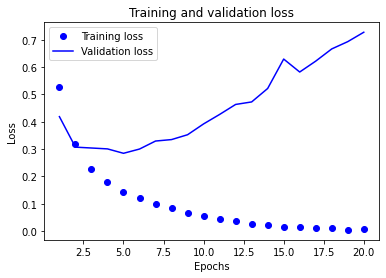

In [38]:
acc = history_dict['accuracy']

import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, 21)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

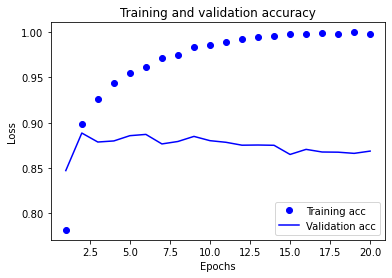

In [41]:
plt.clf()
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()